In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [2]:
df=pd.read_csv(r"C:\Users\vikas\OneDrive\Desktop\customer_churn_dataset-training-master.csv")

In [3]:
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.shape

(440833, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
df.describe()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)


In [8]:
df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
df.dropna(inplace=True)


In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df.isnull().sum()


Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [12]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [13]:
numerical_columns=['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Churn']

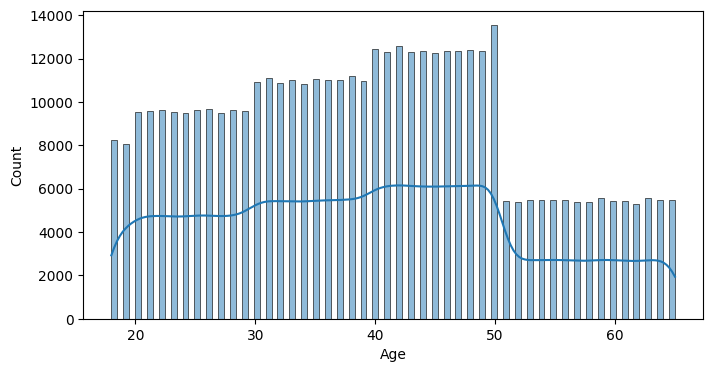

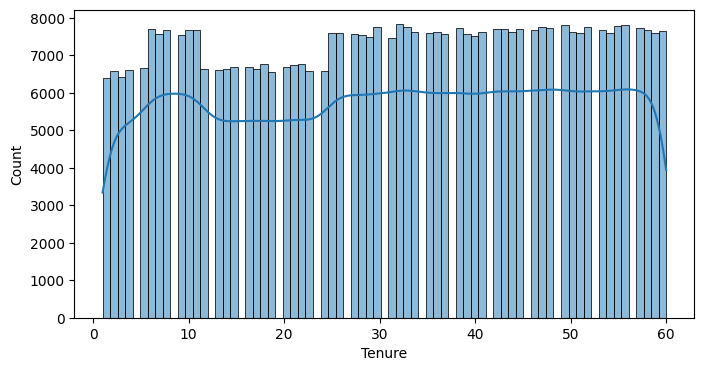

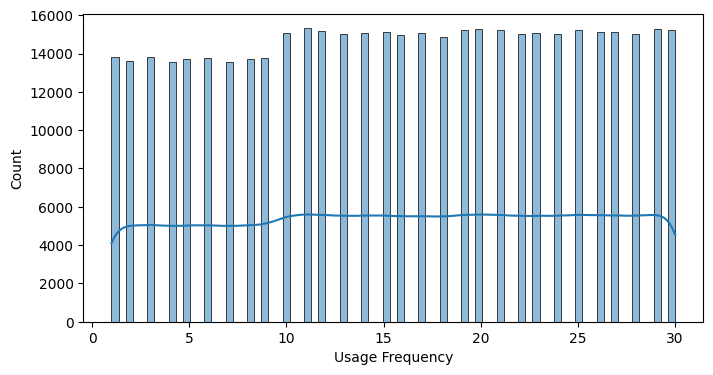

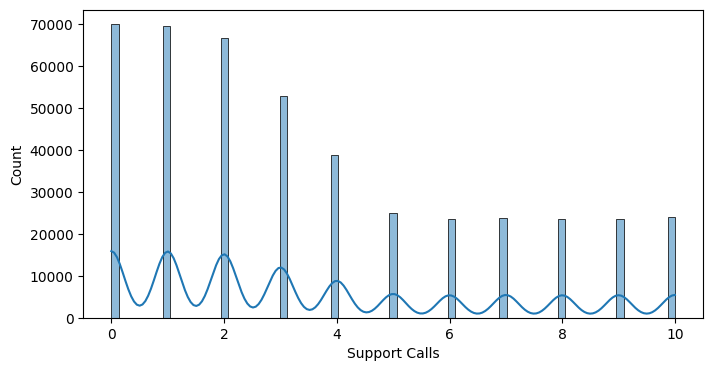

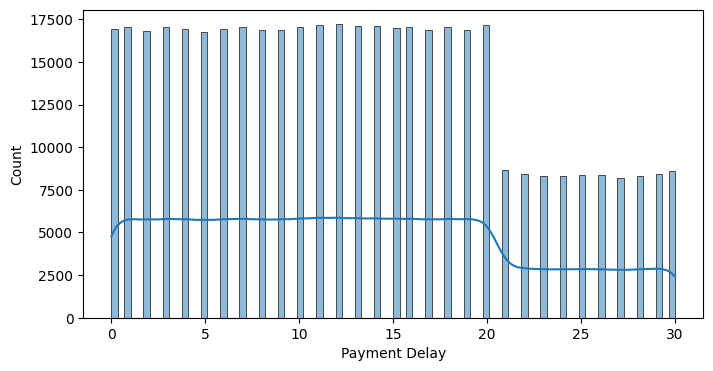

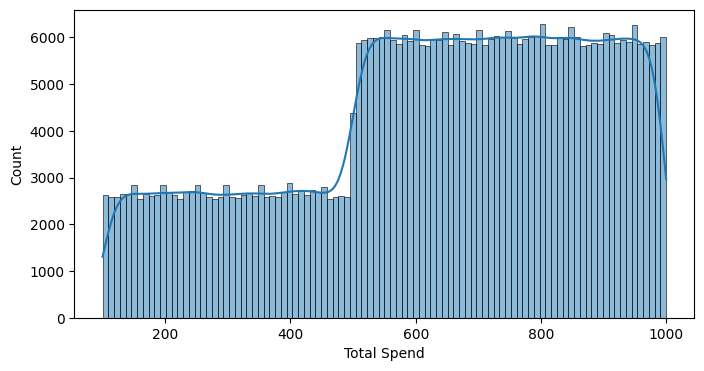

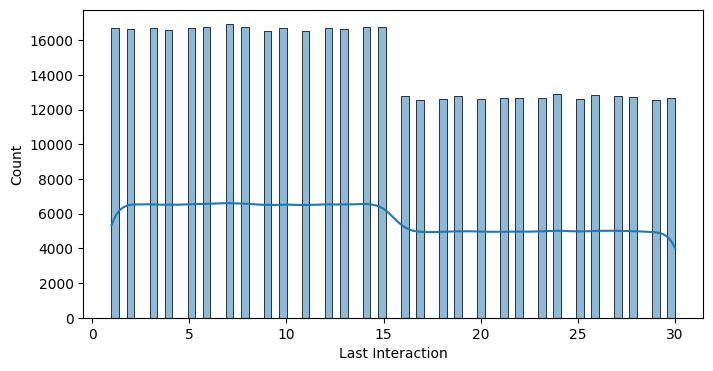

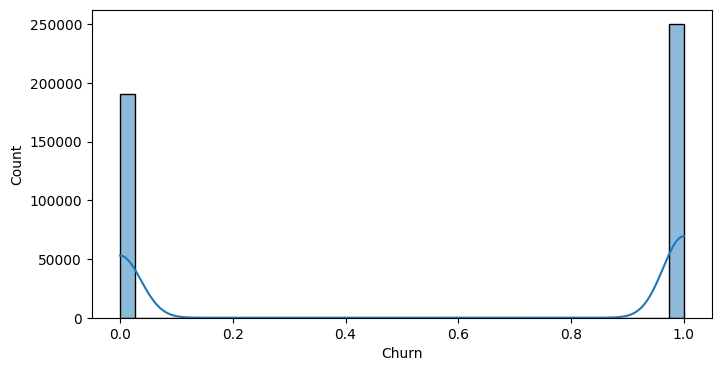

In [14]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col],kde=True)

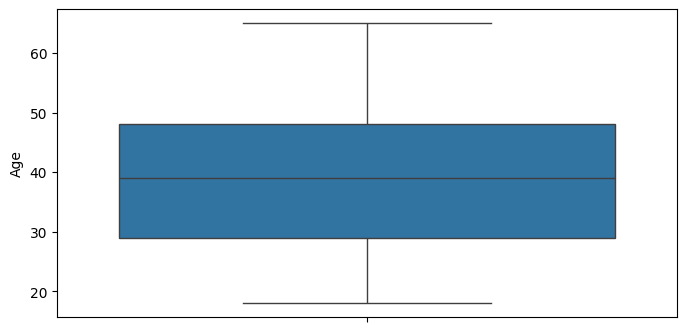

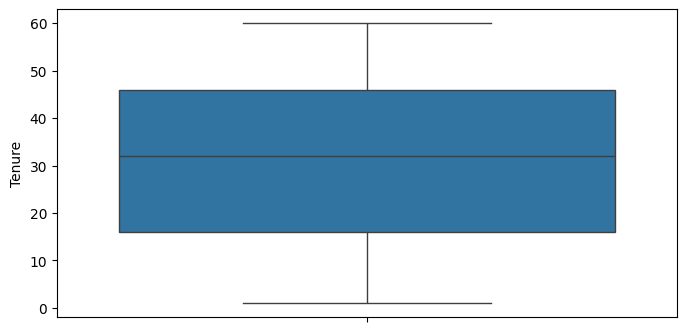

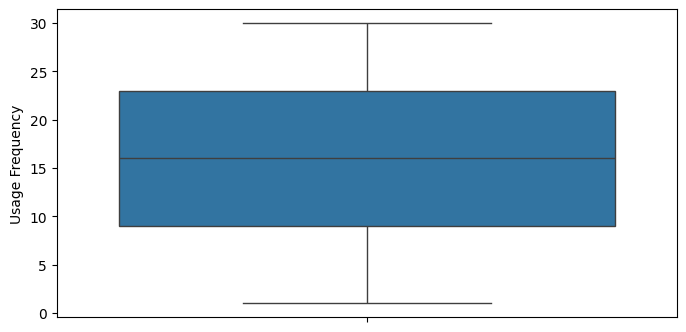

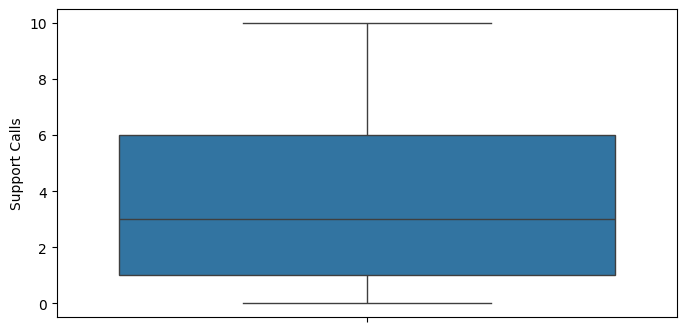

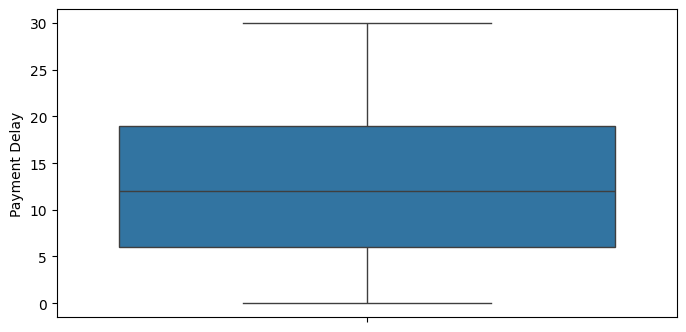

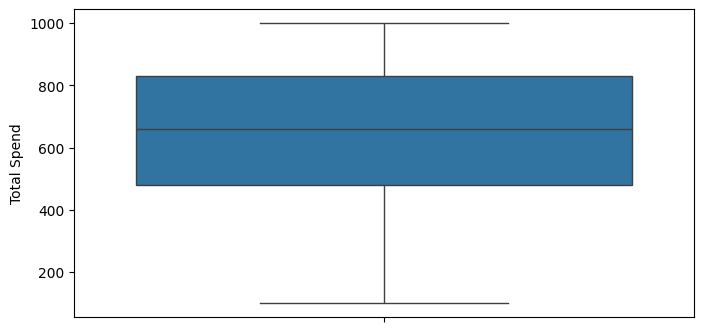

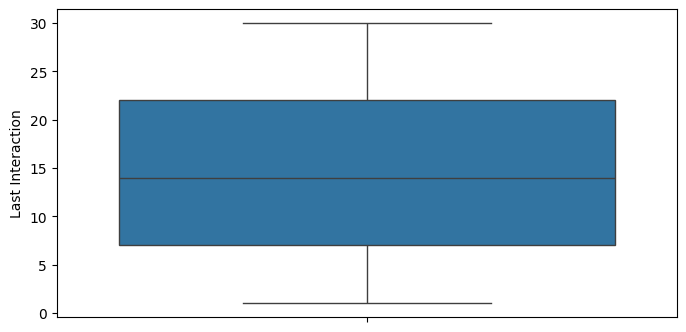

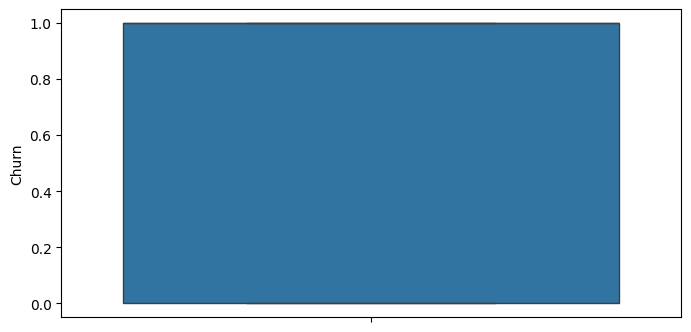

In [15]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[col])

<Axes: >

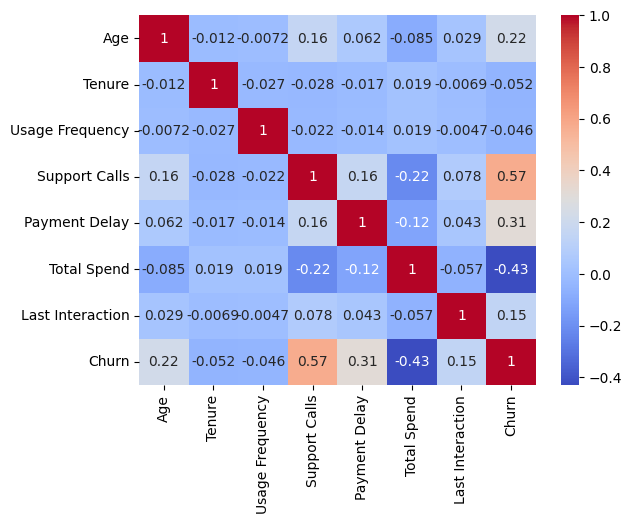

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')   

In [17]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
df.drop(['Last Interaction'],axis=1,inplace=True)

In [19]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,1.0


In [20]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [21]:
# One-hot encoding with exact column names
df = pd.get_dummies(df, columns=['Subscription Type'], drop_first=False)



In [22]:
df = pd.get_dummies(df, columns=['Contract Length'], drop_first=False)

In [23]:
cols = ['Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard','Contract Length_Monthly','Contract Length_Annual','Contract Length_Quarterly']
df[cols] = df[cols].astype(int)


In [24]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,Female,39.0,14.0,5.0,18.0,932.0,1.0,0,0,1,1,0,0
1,65.0,Female,49.0,1.0,10.0,8.0,557.0,1.0,1,0,0,0,1,0
2,55.0,Female,14.0,4.0,6.0,18.0,185.0,1.0,1,0,0,0,0,1
3,58.0,Male,38.0,21.0,7.0,7.0,396.0,1.0,0,0,1,0,1,0
4,23.0,Male,32.0,20.0,5.0,8.0,617.0,1.0,1,0,0,0,1,0


In [25]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [26]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.0,1.0,0,0,1,1,0,0
1,65.0,0,49.0,1.0,10.0,8.0,557.0,1.0,1,0,0,0,1,0
2,55.0,0,14.0,4.0,6.0,18.0,185.0,1.0,1,0,0,0,0,1
3,58.0,1,38.0,21.0,7.0,7.0,396.0,1.0,0,0,1,0,1,0
4,23.0,1,32.0,20.0,5.0,8.0,617.0,1.0,1,0,0,0,1,0


In [27]:
scaler=StandardScaler()
numerical_cols=['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend']
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [28]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.753326,0,0.448760,-0.210511,0.454549,0.609620,1.247427,1.0,0,0,1,1,0,0
1,2.059646,0,1.028278,-1.724562,2.083100,-0.601319,-0.309865,1.0,1,0,0,0,1,0
2,1.255940,0,-1.000036,-1.375166,0.780259,0.609620,-1.854698,1.0,1,0,0,0,0,1
3,1.497051,1,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.0,0,0,1,0,1,0
4,-1.315921,1,0.043097,0.488282,0.454549,-0.601319,-0.060698,1.0,1,0,0,0,1,0


In [29]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=model.predict(x_test)

In [32]:
confusion_matrix(y_test,y_pred)

array([[38061,     2],
       [  770, 49334]])

In [33]:
y_prob=model.predict_proba(x_test)[:,1]
y_prob

array([1.  , 1.  , 0.99, ..., 0.  , 1.  , 0.  ], shape=(88167,))

In [34]:
accuracy=classification_report(y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [36]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_prob)

In [37]:
print("AUC-ROC:", auc)

AUC-ROC: 0.9970634062785118


In [38]:
model_lgbm=LGBMClassifier()
model_lgbm.fit(x_train,y_train)
y_pred_lgbm=model_lgbm.predict(x_test)
y_prob_lgbm=model_lgbm.predict_proba(x_test)[:,1]
auc_lgbm=roc_auc_score(y_test,y_prob_lgbm)
print("AUC-ROC for LGBM:", auc_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199895, number of negative: 152770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566813 -> initscore=0.268859
[LightGBM] [Info] Start training from score 0.268859
AUC-ROC for LGBM: 0.997499406892702


In [39]:
accuracy=classification_report(y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [40]:
model_cat=CatBoostClassifier(verbose=0)
model_cat.fit(x_train,y_train)
y_pred_cat=model_cat.predict(x_test)
y_prob_cat=model_cat.predict_proba(x_test)[:,1]
auc_cat=roc_auc_score(y_test,y_prob_cat)
print("AUC-ROC for CatBoost:", auc_cat)


AUC-ROC for CatBoost: 0.9975041772032281


In [41]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model_cat.predict(x_test)
y_prob = model_cat.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.991334626334116
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [42]:
import xgboost
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
y_prob_xgb=model_xgb.predict_proba(x_test)[:,1]
auc_xgb=roc_auc_score(y_test,y_prob_xgb)
print("AUC-ROC for XGBoost:", auc_xgb)


AUC-ROC for XGBoost: 0.9973984863133266


In [43]:
metrics=classification_report(y_test,y_pred_xgb)
print(metrics)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [45]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Models dictionary (already trained)
models = {
    "RandomForest": model,
    "XGBoost": model_xgb,
    "LightGBM": model_lgbm,
    "CatBoost": model_cat
}

print(f"{'Model':<12} {'Train AUC':<10} {'Test AUC':<10} {'Train Acc':<10} {'Test Acc':<10}")
print("-"*60)

for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(x_train)
    y_train_prob = model.predict_proba(x_train)[:, 1]
    
    y_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    
    # Metrics
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"{name:<12} {train_auc:<10.4f} {test_auc:<10.4f} {train_acc:<10.4f} {test_acc:<10.4f}")


Model        Train AUC  Test AUC   Train Acc  Test Acc  
------------------------------------------------------------
RandomForest 1.0000     0.9971     1.0000     0.9912    
XGBoost      0.9991     0.9974     0.9915     0.9913    
LightGBM     0.9983     0.9975     0.9915     0.9914    
CatBoost     0.9989     0.9975     0.9915     0.9913    


In [ ]:



joblib.dump(model_cat, "catboost_model.pkl")

['catboost_model.pkl']

In [50]:
joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']

In [51]:
joblib.dump(model_xgb, "xgboost_model.pkl")

['xgboost_model.pkl']

In [52]:
joblib.dump(model_lgbm, "lgbm_model.pkl")

['lgbm_model.pkl']

In [53]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:

joblib.dump(le, "gender_label_encoder.pkl")


['gender_label_encoder.pkl']

In [55]:
joblib.dump(x, "columns.pkl")

['columns.pkl']